In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
data=pd.read_csv("../data/preprocessed_data.csv")

In [73]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,0,0.639085,0.490909,0.583426,67,0.425887,40,0,4
1,2,OnePlus 9,0,0.419014,0.336364,0.382386,42,0.351566,47,1,3
2,3,Xiaomi Mi 11,0,0.218310,0.272727,0.170569,32,0.091858,42,0,2
3,4,Google Pixel 5,0,0.367958,0.345455,0.510591,56,0.321086,20,0,3
4,5,iPhone 12,1,0.276408,0.300000,0.395764,58,0.369937,31,1,3


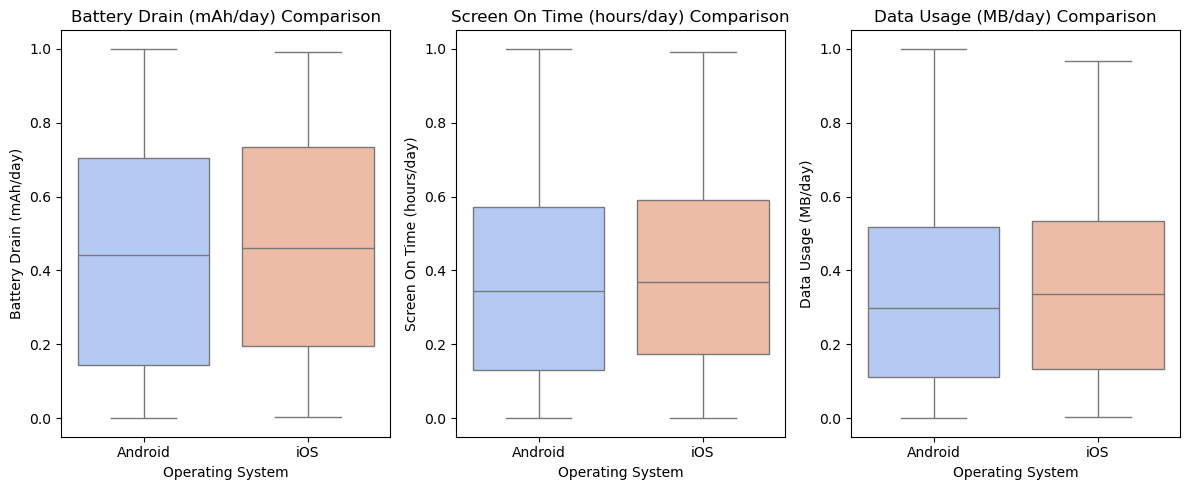

In [74]:


features = ["Battery Drain (mAh/day)", "Screen On Time (hours/day)", "Data Usage (MB/day)"]

plt.figure(figsize=(12, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data["Operating System"], y=data[feature], hue=data["Operating System"], legend=False, palette="coolwarm")
    plt.title(f"{feature} Comparison")
    plt.xlabel("Operating System")
    plt.ylabel(feature)
    
    # Set the x-axis labels to 0 for Android and 1 for iOS
    plt.xticks(ticks=[0, 1], labels=["Android", "iOS"])
    
    plt.savefig("../visualizations/os_boxplot.png")


plt.tight_layout()

plt.show()

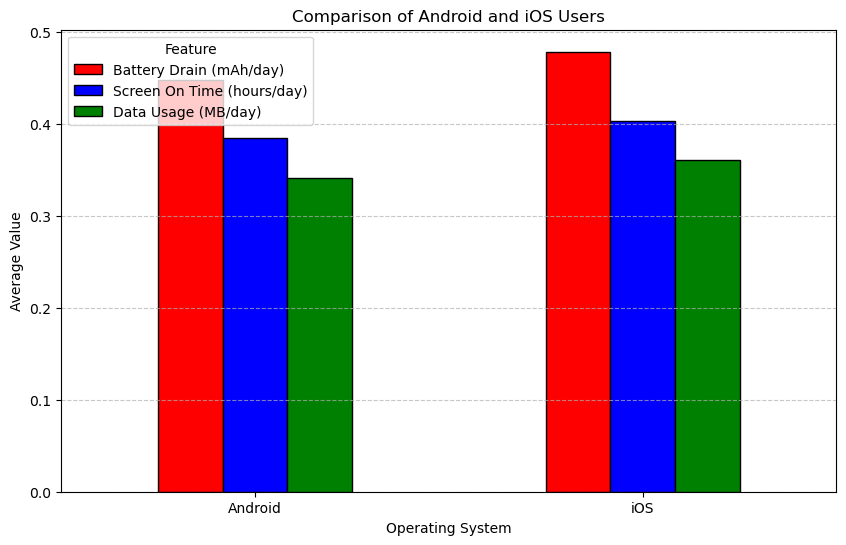

In [75]:
# Compute mean values
mean_values = data.groupby("Operating System")[features].mean()

# Plot grouped bar chart
colors = ["red", "blue", "green", "purple", "orange"]
ax = mean_values.plot(kind="bar", figsize=(10, 6), color=colors, edgecolor="black")

plt.title("Comparison of Android and iOS Users")
plt.xlabel("Operating System")
plt.ylabel("Average Value")
plt.xticks(ticks=[0, 1], labels=["Android", "iOS"], rotation=0)  # Manually set labels
plt.legend(title="Feature")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("../visualizations/os_type_bar.png")
plt.show()


In [76]:
from scipy.stats import ttest_ind

# Define the features to compare
features = ["Battery Drain (mAh/day)", "Screen On Time (hours/day)", "Data Usage (MB/day)"]

# Separate Android and iOS users
android_users = data[data["Operating System"] == 0]
ios_users = data[data["Operating System"] == 1]

# Perform t-tests for each feature
for feature in features:
    t_stat, p_value = ttest_ind(android_users[feature], ios_users[feature], equal_var=False)  # Welch’s t-test
    print(f"\nFeature: {feature}")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.5f}")
    
    if p_value < 0.05:
        print("→ Significant difference between Android and iOS users ")
    else:
        print("→ No significant difference between Android and iOS users ")


Feature: Battery Drain (mAh/day)
T-statistic: -1.069, P-value: 0.28620
→ No significant difference between Android and iOS users 

Feature: Screen On Time (hours/day)
T-statistic: -0.717, P-value: 0.47381
→ No significant difference between Android and iOS users 

Feature: Data Usage (MB/day)
T-statistic: -0.772, P-value: 0.44072
→ No significant difference between Android and iOS users 
